<a href="https://colab.research.google.com/github/UTKARSH0242/AgeInMinute/blob/master/gold_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

## Data Collection and Processing


In [6]:
# loading the csv data to a Pandas dataframe
gold_data = pd.read_csv('/content/gld_price_data.csv')

In [7]:
# Print first five rows in the data frame
gold_data.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [8]:
from google.colab import sheets
sheet = sheets.InteractiveSheet(df=gold_data)

https://docs.google.com/spreadsheets/d/1iRmtwFRjH3HHxuQCRzaaPh_hsCvEfeFXvOKT9i32hOQ/edit#gid=0


In [9]:
# print last 5 rows of data frame
gold_data.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [10]:
# number of rows and colums
gold_data.shape

(2290, 6)

In [11]:
# getting some basic info about the data
gold_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [12]:
# number of missing value
gold_data.isnull().sum()

,0
Date,0
SPX,0
GLD,0
USO,0
SLV,0
EUR/USD,0


In [13]:
# getting the statistical measure of the data
gold_data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


## Correlation :
1. Positive
2. Negative

In [20]:
# Exclude the 'Date' column and convert other columns to numeric, coercing errors to NaN
gold_data_numeric = gold_data.drop('Date', axis=1).apply(pd.to_numeric, errors='coerce')

# Calculate the correlation
correlation = gold_data_numeric.corr()

# Display the correlation matrix
display(correlation)

,SPX,GLD,USO,SLV,EUR/USD
SPX,1.000000,0.049345,-0.591573,-0.274055,-0.672017
GLD,0.049345,1.000000,-0.186360,0.866632,-0.024375
USO,-0.591573,-0.186360,1.000000,0.167547,0.829317
SLV,-0.274055,0.866632,0.167547,1.000000,0.321631
EUR/USD,-0.672017,-0.024375,0.829317,0.321631,1.000000


<Axes: >

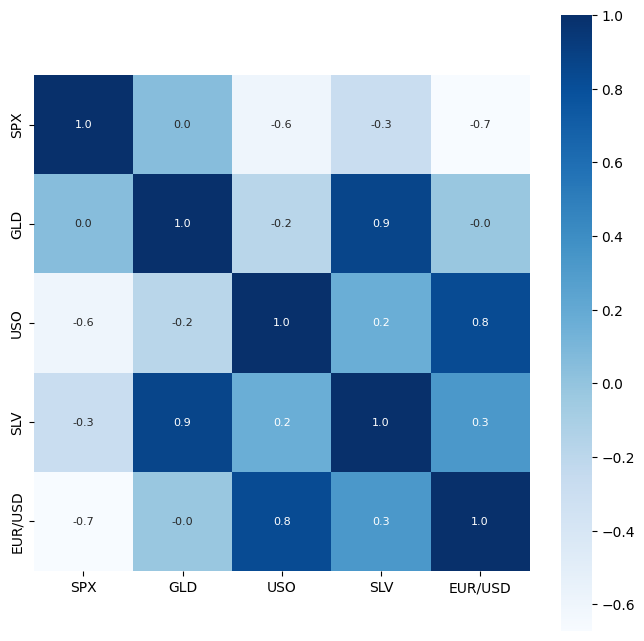

In [22]:
plt.figure(figsize = (8,8))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size':8}, cmap='Blues')

In [23]:
# correlation value of GLD
print(correlation['GLD'])


SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


In [18]:
# GLD_adj_close = gold_data['Adj Close']
# SPY_adj_close = gold_data['SP_Ajclose']
# DJ_adj_close  = gold_data['DJ_Ajclose']

# df_p = pd.DataFrame({'GLD':GLD_adj_close, 'SPY':SPY_adj_close, 'DJ':DJ_adj_close})

# df_ax = df_p.plot(title='Effect of Index prices on gold rates',figsize=(15,10))

# df_ax.set_ylabel('Price')
# df_ax.legend(loc='upper left')
# plt.show()

In [ ]:
# def compute_daily_returns(df):
#   daily_return = (df / df.shift(1)) - 1
#   daily_return[0] = 0
#   return daily_return



In [ ]:
# GLD_adj_close = gold_data['Adj Close']
# SPY_adj_close = gold_data['SP_Ajclose']
# DJ_adj_close  = gold_data['DJ_Ajclose']
# EG_adj_close =  gold_data['EG_Ajclose']
# USO_Adj_close = gold_data['USO_Adj Close']
# GDX_Adj_close = gold_data['GDX_Adj Close']
# EU_price      = gold_data['EU_Price']
# OF_price      = gold_data['OF_Price']
# OS_price      = gold_data['OS_Price']
# SF_price      = gold_data['SF_Price']
# USB_price      = gold_data['USB_Price']
# PLT_price      = gold_data['PLT_Price']
# PLD_price      = gold_data['PLD_Price']
# rho_price      = gold_data['RHO_PRICE']
# usdi_price      = gold_data['USDI_Price']



# GLD_daily_return = compute_daily_returns(GLD_adj_close)
# SPY_daily_return = compute_daily_returns(SPY_adj_close)
# DJ_adj_return    = compute_daily_returns(DJ_adj_close)
# EG_adj_return     = compute_daily_returns(EG_adj_close)
# USO_Adj_return    = compute_daily_returns(USO_Adj_close)
# GDX_Adj_return   =compute_daily_returns(GDX_Adj_close)
# EU_return        = compute_daily_returns(EU_price)
# OF_price         =compute_daily_returns(OF_price)
# OS_price         =compute_daily_returns(OS_price)
# SF_price         =compute_daily_returns(SF_price)
# USB_price         =compute_daily_returns(USB_price)
# PLT_price         =compute_daily_returns(PLT_price)
# PLD_price         =compute_daily_returns(PLD_price)
# rho_price         =compute_daily_returns(rho_price)
# USDI_price         =compute_daily_returns(usdi_price)

# df_d = pd.DataFrame({'GLD':GLD_daily_return, 'SPY':SPY_daily_return, 'DJ':DJ_adj_return, 'EG':EG_adj_return, 'USO':USO_Adj_return,
#                   'GDX':GDX_Adj_return,'EU':EU_return, 'OF':OF_price,'SF':SF_price,'OS':OS_price, 'USB':USB_price, 'PLT':PLT_price, 'PLD':PLD_price,
#                   'RHO':rho_price,'USDI':USDI_price})

# daily_ax = df_d[-100:].plot(title='Last 100 records of daily return of all features',figsize=(15,8))

# daily_ax.set_ylabel('Daily return')
# daily_ax.legend(loc='lower left')
# plt.show()

In [ ]:
# GLD_daily_return = compute_daily_returns(GLD_adj_close)
# SPY_daily_return = compute_daily_returns(SPY_adj_close)
# DJ_adj_return    = compute_daily_returns(DJ_adj_close)

In [ ]:
# df_s = pd.DataFrame({'GLD':GLD_daily_return, 'SPY':SPY_daily_return, 'DJ':DJ_adj_return})

# daily_ax = df_s[-100:].plot(title='Last 100 records of daily return of Stock Indexes',figsize=(15,8))

# daily_ax.set_ylabel('Daily return')
# daily_ax.legend(loc='lower left')
# plt.show()

In [ ]:
# df_d.plot(kind='scatter', x='SPY', y='GLD')

In [ ]:
# df_d.plot(kind='scatter', x='DJ', y='GLD')

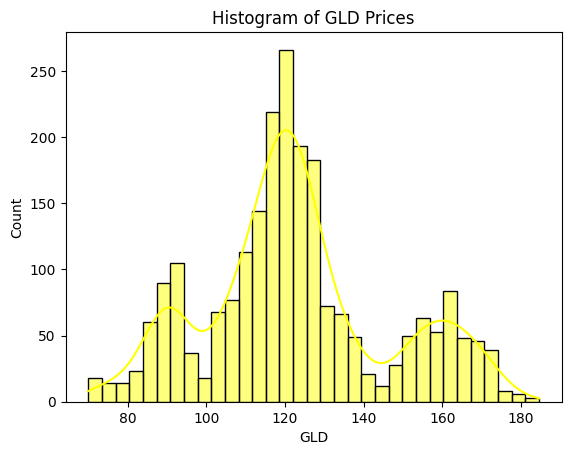

In [29]:
# Plot a histogram for 'GLD'
sns.histplot(data=gold_data, x='GLD', color='yellow', kde=True)
plt.title('Histogram of GLD Prices')
plt.show()

# Plot a histogram for 'flipper_length_mm'
# sns.histplot(data=gold_data, x='flipper_length_mm', color='blue', kde=True)
# plt.title('Histogram of Flipper Length')
# plt.show()

Splitting the feature and target


In [30]:
x = gold_data.drop(['Date','GLD'],axis=1)
y = gold_data['GLD']

In [31]:
print(x)

              SPX        USO      SLV   EUR/USD
0     1447.160034  78.470001  15.1800  1.471692
1     1447.160034  78.370003  15.2850  1.474491
2     1411.630005  77.309998  15.1670  1.475492
3     1416.180054  75.500000  15.0530  1.468299
4     1390.189941  76.059998  15.5900  1.557099
...           ...        ...      ...       ...
2285  2671.919922  14.060000  15.5100  1.186789
2286  2697.790039  14.370000  15.5300  1.184722
2287  2723.070068  14.410000  15.7400  1.191753
2288  2730.129883  14.380000  15.5600  1.193118
2289  2725.780029  14.405800  15.4542  1.182033

[2290 rows x 4 columns]


In [32]:
print(y)

0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64


Splitting into training data and test data

In [33]:
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size = 0.2, random_state=2)

## Model training
1. Random Forest Algo


In [34]:
regressor = RandomForestRegressor(n_estimators=100)

In [37]:
# training the model
regressor.fit(X_train, Y_train)

RandomForestRegressor()

Model Evaluation


In [38]:
test_data_prediction = regressor.predict(X_test)

In [39]:
print(test_data_prediction)

[168.63209949  81.89489994 116.39660039 127.61690085 120.55130133
 154.82269746 150.45759839 126.25419975 117.51689868 125.86380098
 116.60570084 171.68700119 141.27839909 167.73429853 115.20510009
 117.55260044 141.02480301 170.02630026 159.81230338 158.44479922
 155.19830043 125.28960012 175.96309914 156.68300341 125.3485004
  93.73960004  77.42240012 120.44940009 119.12629954 167.4525998
  88.26130083 125.50670027  91.18350111 117.77960044 121.13419949
 136.40100013 115.37180106 114.77650075 145.9451988  107.23170109
 104.11850221  87.10249775 126.57830032 118.12049986 153.45559924
 119.69249993 108.45549999 108.35589837  93.04990055 127.05449803
  74.82340063 113.70429946 121.32729987 111.27859925 118.86499894
 120.54229956 158.41660039 166.11030135 146.9593971   86.08959886
  94.54320029  86.78779846  90.44049998 118.89900106 126.39640045
 127.48600009 169.3619004  122.21179955 117.38589882  98.27340015
 168.24539941 143.03579871 131.84900205 121.17860221 120.8043995
 119.69010073

In [40]:
# R sqaure error
error_score = metrics.r2_score(Y_test, test_data_prediction)
print("R squared error : ", error_score)


R squared error :  0.9890885511821058


In [43]:
Y_test = list(Y_test)

Compare the Actual value and predicted value in plot


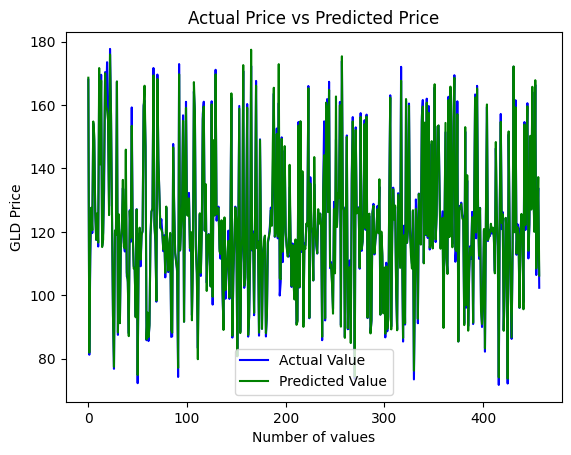

In [45]:
plt.plot(Y_test, color='blue', label='Actual Value')
plt.plot(test_data_prediction, color='green', label='Predicted Value')
plt.title('Actual Price vs Predicted Price')
plt.xlabel('Number of values')
plt.ylabel('GLD Price')
plt.legend()
plt.show()